<a href="https://colab.research.google.com/github/Hemen-G/Mango-leaf-disease-detection/blob/main/Mango_Disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#connection with drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split


SOURCE_DIR = "/content/drive/MyDrive/MangoLeafBD/MangoLeafBD Dataset"


TARGET_DIR = "/content/drive/MyDrive/dataset/mango"

splits = ['train', 'validation', 'test']


for split in splits:
    for class_name in os.listdir(SOURCE_DIR):
        os.makedirs(os.path.join(TARGET_DIR, split, class_name), exist_ok=True)


for class_name in os.listdir(SOURCE_DIR):
    class_dir = os.path.join(SOURCE_DIR, class_name)
    images = os.listdir(class_dir)


    images = [img for img in images if img.lower().endswith(('.jpg', '.jpeg', '.png'))]


    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)

    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=1/3, random_state=42)

    for img in train_imgs:
        shutil.copy(os.path.join(class_dir, img), os.path.join(TARGET_DIR, 'train', class_name, img))
    for img in val_imgs:
        shutil.copy(os.path.join(class_dir, img), os.path.join(TARGET_DIR, 'validation', class_name, img))
    for img in test_imgs:
        shutil.copy(os.path.join(class_dir, img), os.path.join(TARGET_DIR, 'test', class_name, img))

print("✅ Dataset successfully split into train (70%)/validation (20%)/test (10%) sets!")

✅ Dataset successfully split into train (70%)/validation (20%)/test (10%) sets!


In [ ]:
import os


TARGET_DIR = "/content/drive/MyDrive/dataset/mango"


splits = ['train', 'validation', 'test']

for class_name in os.listdir(os.path.join(TARGET_DIR, 'train')):
    print(f"\nClass: {class_name}")
    total_count = 0
    counts = {}

    for split in splits:
        split_path = os.path.join(TARGET_DIR, split, class_name)
        if os.path.exists(split_path):
            count = len(os.listdir(split_path))
            counts[split] = count
            total_count += count


    for split in splits:
        if split in counts:
            percentage = (counts[split] / total_count) * 100
            print(f"{split.capitalize()}: {counts[split]} images ({percentage:.1f}%)")

    print(f"Total: {total_count} images")


print("\nOverall Distribution:")
total_images = 0
split_counts = {'train': 0, 'validation': 0, 'test': 0}

for split in splits:
    split_dir = os.path.join(TARGET_DIR, split)
    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        count = len(os.listdir(class_dir))
        split_counts[split] += count
        total_images += count

for split, count in split_counts.items():
    percentage = (count / total_images) * 100
    print(f"{split.capitalize()}: {count} images ({percentage:.1f}%)")

print(f"Total images in dataset: {total_images}")


Class: Anthracnose
Train: 350 images (70.0%)
Validation: 100 images (20.0%)
Test: 50 images (10.0%)
Total: 500 images

Class: Bacterial Canker
Train: 349 images (69.9%)
Validation: 100 images (20.0%)
Test: 50 images (10.0%)
Total: 499 images

Class: Cutting Weevil
Train: 350 images (70.0%)
Validation: 100 images (20.0%)
Test: 50 images (10.0%)
Total: 500 images

Class: Die Back
Train: 350 images (70.0%)
Validation: 100 images (20.0%)
Test: 50 images (10.0%)
Total: 500 images

Class: Gall Midge
Train: 350 images (70.0%)
Validation: 100 images (20.0%)
Test: 50 images (10.0%)
Total: 500 images

Class: Healthy
Train: 350 images (70.0%)
Validation: 100 images (20.0%)
Test: 50 images (10.0%)
Total: 500 images

Class: Powdery Mildew
Train: 350 images (70.0%)
Validation: 100 images (20.0%)
Test: 50 images (10.0%)
Total: 500 images

Class: Sooty Mould
Train: 349 images (69.9%)
Validation: 100 images (20.0%)
Test: 50 images (10.0%)
Total: 499 images

Overall Distribution:
Train: 2798 images (70

#importing Libraries


In [ ]:
!pip install tensorflow matplotlib pillow scikit-learn seaborn pandas

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import os
from collections import Counter

print("✅ All packages imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print("GPU Available:", tf.config.list_physical_devices('GPU'))

✅ All packages imported successfully!
TensorFlow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#Data preprocessing

###Training Image Preprocessing

In [ ]:
def check_image_validity(file_path):
    try:
        img = tf.io.read_file(file_path)
        tf.image.decode_image(img)
        return True
    except:
        return False
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset/mango/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,

    verbose=True,
)

Found 2798 files belonging to 8 classes.


###validation image processing

In [ ]:
def check_image_validity(file_path):
    try:
        img = tf.io.read_file(file_path)
        tf.image.decode_image(img)
        return True
    except:
        return False
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset/mango/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,

    verbose=True,
)

Found 800 files belonging to 8 classes.


In [ ]:
for x,y in training_set:
  print(x, x.shape)
  print(y, y.shape)
  break

tf.Tensor(
[[[[166.75     156.75     147.75    ]
   [164.625    154.625    145.25    ]
   [164.625    154.625    144.625   ]
   ...
   [207.       207.       207.      ]
   [207.625    207.625    207.625   ]
   [208.       208.       208.      ]]

  [[164.48438  151.76562  143.5586  ]
   [165.53125  152.8125   143.77734 ]
   [162.69922  150.54688  139.7539  ]
   ...
   [206.4336   206.4336   206.4336  ]
   [207.625    207.625    207.625   ]
   [208.       208.       208.      ]]

  [[139.88672  126.04297  116.96875 ]
   [158.24219  144.39844  133.71094 ]
   [161.44531  147.69922  135.66406 ]
   ...
   [206.375    206.375    206.375   ]
   [207.09766  207.09766  207.09766 ]
   [207.89453  207.89453  207.89453 ]]

  ...

  [[201.       201.       201.      ]
   [201.       201.       201.      ]
   [201.       201.       201.      ]
   ...
   [211.15625  213.15625  212.15625 ]
   [211.15625  213.15625  212.15625 ]
   [211.15625  213.15625  212.15625 ]]

  [[201.08203  201.08203  201.0820

##Building Model

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential


##Building convulation Layer

##To avoid Overshooting
###1. decrease the learning rate
###2. adding more convulation layer to extract more features
###3. increase number of neuron to avoid underfitting

In [ ]:
model=Sequential()
# input layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu' ))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu' ))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))


model.add(Dropout(0.25))
#flattening the input layer
model.add(Flatten())
#hidden layer
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.4))
#output layer
model.add(Dense(units=8, activation='softmax'))



##Out put layer

##Compiling model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         8,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,595,816 (90.01 MB)

 Trainable params: 23,595,816 (90.01 MB)

 Non-trainable params: 0 (0.00 B)

###Training Model

In [ ]:
training_history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10
)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1457s 17s/step - accuracy: 0.2499 - loss: 2.5522 - val_accuracy: 0.6850 - val_loss: 0.9112
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.6833 - loss: 0.8714 - val_accuracy: 0.7950 - val_loss: 0.5850
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - accuracy: 0.8106 - loss: 0.5360 - val_accuracy: 0.8175 - val_loss: 0.5104
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.8672 - loss: 0.3649 - val_accuracy: 0.8788 - val_loss: 0.3380
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.9077 - loss: 0.2679 - val_accuracy: 0.8900 - val_loss: 0.3349
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.9357 - loss: 0.1976 - val_accuracy: 0.9362 - val_loss: 0.1732
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.9183 - loss: 0.2481 - val_accuracy: 0.9237 - val_loss: 0.2357
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.9214 - loss: 0.2281 - val_accu

##Model Evaluation

In [ ]:
##Model Evaluation on training set
train_loss, train_acc=model.evaluate(training_set)

88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - accuracy: 0.9479 - loss: 0.1329


In [ ]:
print(train_loss, train_acc)

0.1278415024280548 0.9524660706520081


In [ ]:
##Model Evaluation on Validatioon set
val_loss, val_acc=model.evaluate(validation_set)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.9064 - loss: 0.2538


In [ ]:
 print(train_loss, train_acc)

0.1278415024280548 0.9524660706520081


##Saving Model

In [ ]:
model.save('/content/drive/MyDrive/mango_disease_model.keras')
print("Model saved to Google Drive!")

Model saved to Google Drive!


In [ ]:
training_history.history

{'accuracy': [0.39671194553375244,
  0.7215868234634399,
  0.8202287554740906,
  0.8859899640083313,
  0.8981415033340454,
  0.9417440891265869,
  0.9274481534957886,
  0.9267333745956421,
  0.9653323888778687,
  0.9563974142074585],
 'loss': [1.7593705654144287,
  0.7658219933509827,
  0.5055666565895081,
  0.3263993561267853,
  0.27711230516433716,
  0.18083073198795319,
  0.2228369563817978,
  0.20341429114341736,
  0.11326909810304642,
  0.12534686923027039],
 'val_accuracy': [0.6850000023841858,
  0.7950000166893005,
  0.8174999952316284,
  0.8787500262260437,
  0.8899999856948853,
  0.9362499713897705,
  0.9237499833106995,
  0.949999988079071,
  0.9337499737739563,
  0.9024999737739563],
 'val_loss': [0.9112113118171692,
  0.5850449204444885,
  0.5104075074195862,
  0.33801060914993286,
  0.3349010944366455,
  0.1732492595911026,
  0.23571966588497162,
  0.1799420714378357,
  0.22373102605342865,
  0.25811442732810974]}

In [ ]:
import json
with open('/content/drive/MyDrive/training_history.json', 'w') as f:
    json.dump(training_history.history, f)

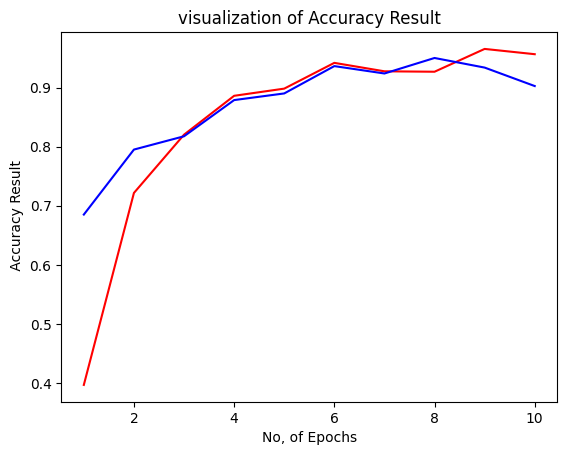

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue', label='Validation Accuracy')
plt.xlabel("No, of Epochs")
plt.ylabel(" Accuracy Result")
plt.title("visualization of Accuracy Result")
plt.show()

In [ ]:
class_name=validation_set.class_names
class_name

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']